In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy
from scipy.stats import uniform

In [3]:
data = pd.read_csv("data/creditcard.csv")

**Link**: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---


- All the data have the correct data type, so we don't have to change it.
- There is no missing value in this data.
- The target or labeled data is class. We need to pay attention to class columns because it have imbalanced data. More data labeled by 0 so we cannot use accuracy as our performance metrics.

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


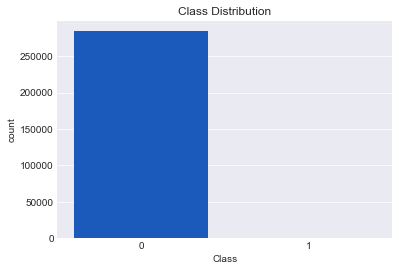

In [7]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "Class", data = data, palette = "winter")
plt.title("Class Distribution")
plt.show()

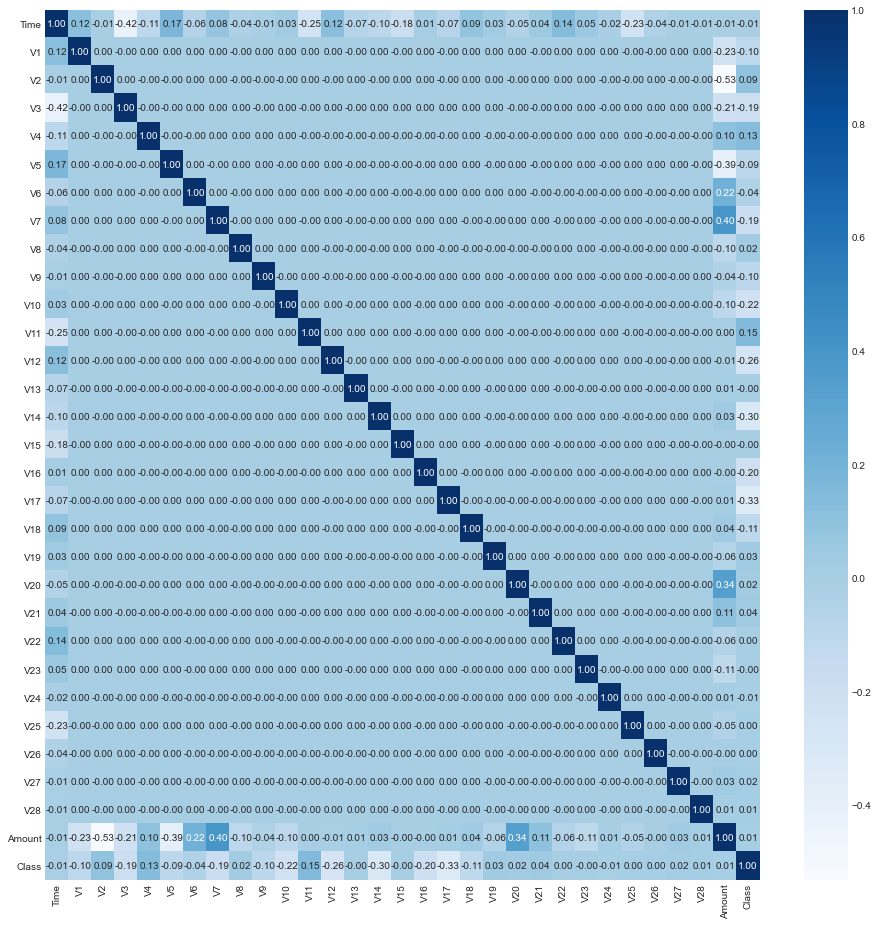

In [8]:
plt.figure(figsize = (16, 16))
sns.heatmap(data.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

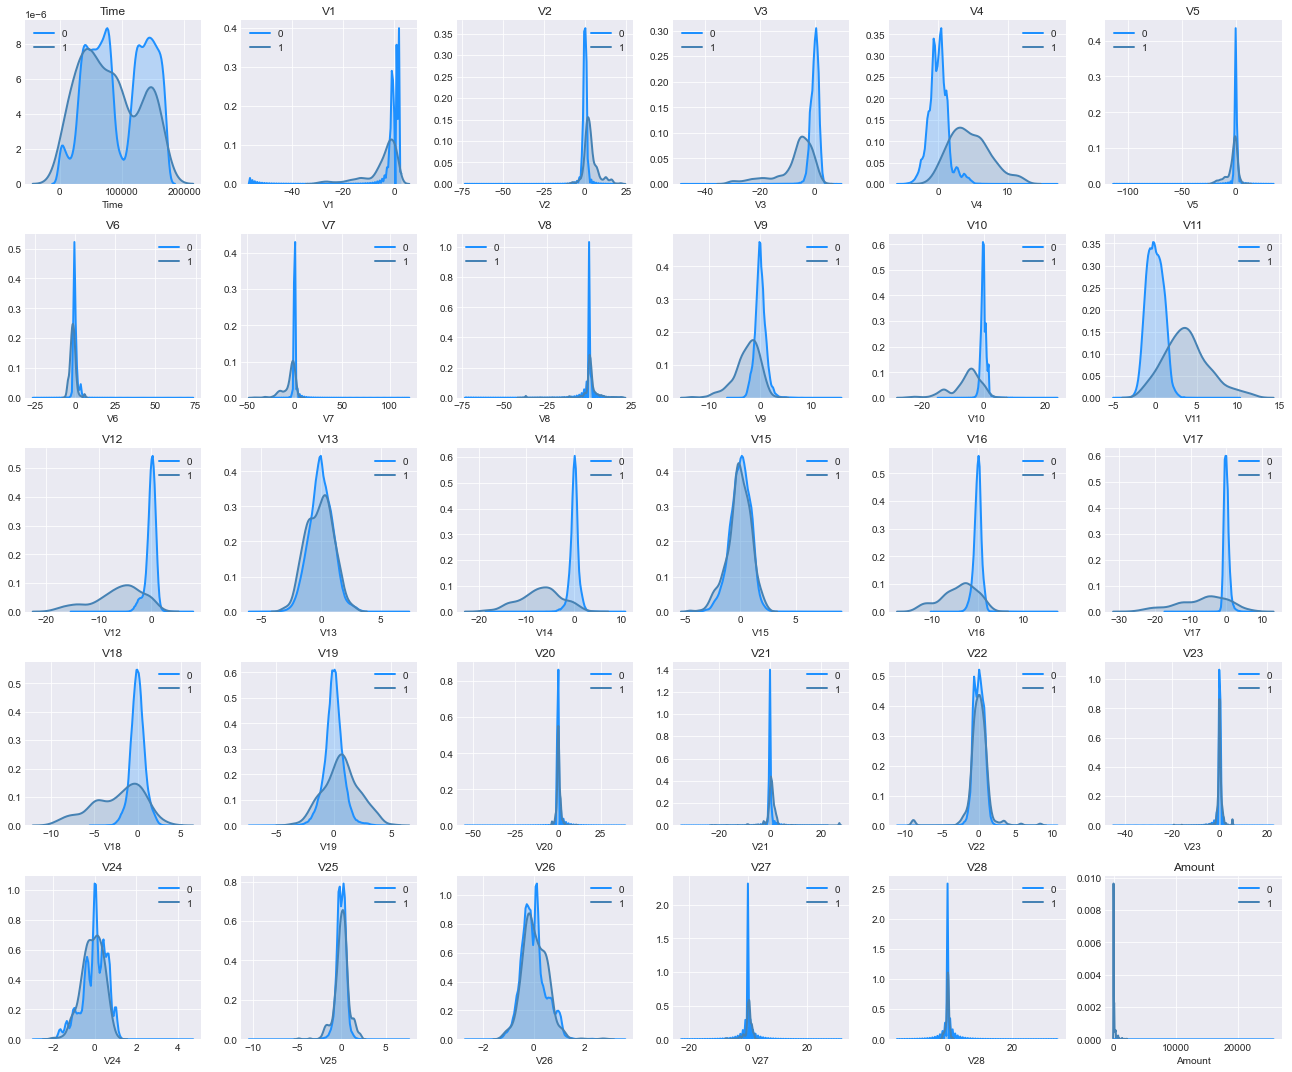

In [9]:
ncols = 6
nrows = 5
fig, ax = plt.subplots(nrows, ncols, figsize = (18,15))
colors = ["dodgerblue", "steelblue"]
for nrow in range(nrows):
    for ncol in range(ncols):
        for i in range(len(data["Class"].unique())):
            sns.distplot(data[data["Class"] == i][data.columns[(nrow * ncols) + ncol]], hist = False, kde_kws = {"shade": True, "linewidth": 2},
                         color = colors[i], label = i, ax = ax[nrow, ncol])
            ax[nrow, ncol].set_title(data.columns[(nrow * ncols) + ncol])
plt.tight_layout()
plt.show()

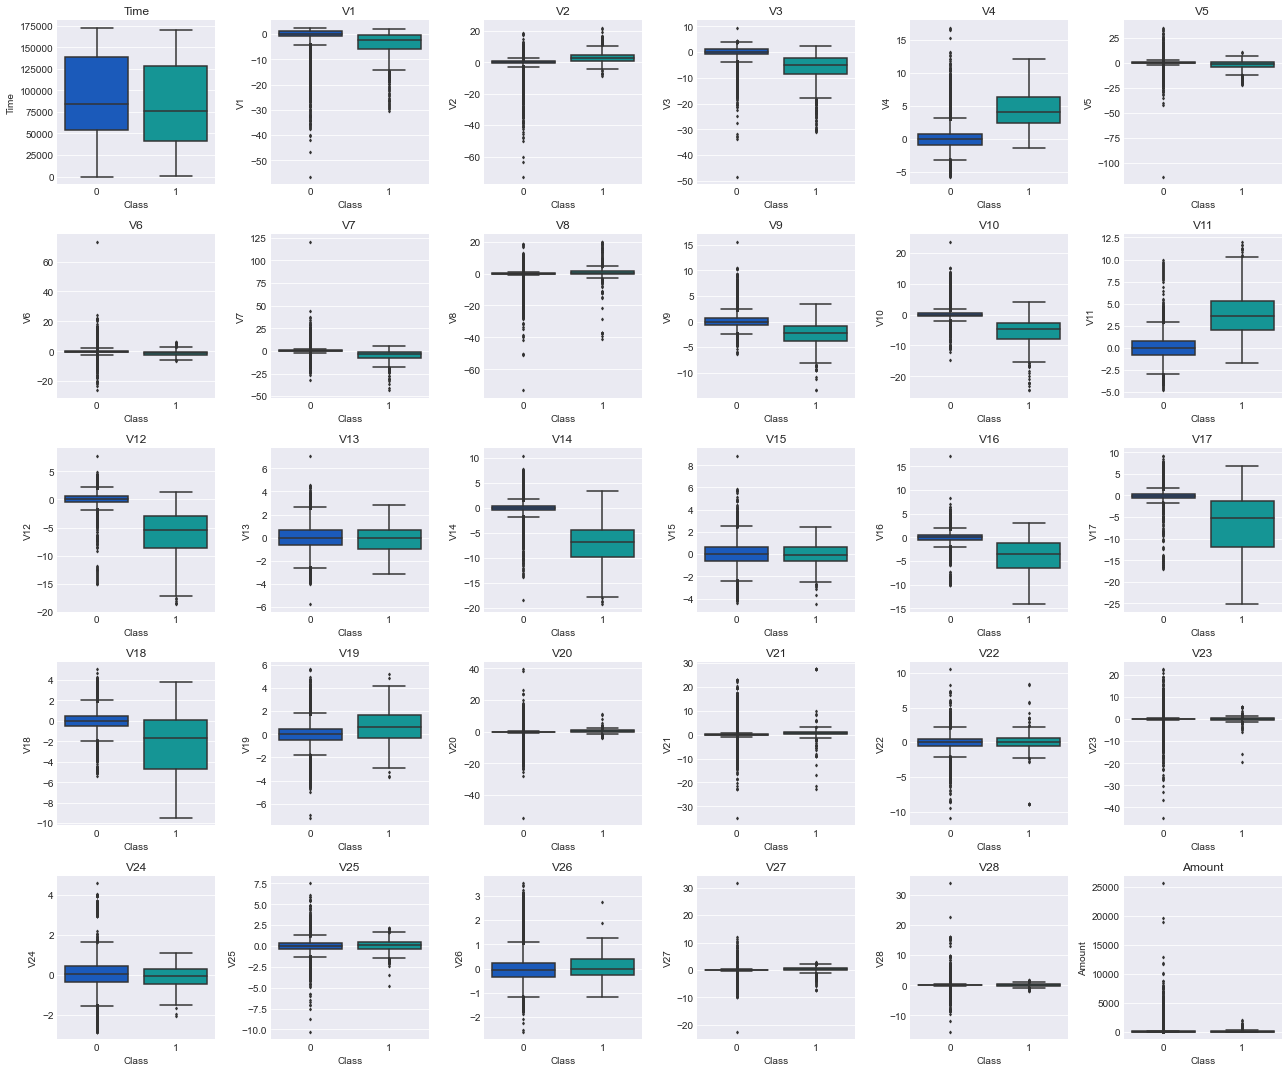

In [9]:
ncols = 6
nrows = 5
fig, ax = plt.subplots(nrows, ncols, figsize = (18,15))
for nrow in range(nrows):
    for ncol in range(ncols):
        sns.boxplot(x = "Class", y = data[data.columns[(nrow * ncols) + ncol]], data = data,
                    fliersize = 2, palette = "winter",
                    ax = ax[nrow, ncol])
        ax[nrow, ncol].set_title(data.columns[(nrow * ncols) + ncol])
plt.tight_layout()
plt.show()

---
## **2. PREPARE THE DATA**
---

- We check p-value for each columns and we know that V12 (14.7%) and V24 (30.6%) is higer than 5%. We need to drop the column with highest p-value (V24) and check again the p-value for each columns.
- After we run again, we still get p-value for V12 is higher than 5% and we drop it from our data.
- We run the script again and there is no columns that have p-value higher than 5%.
- We take all columns with p-value lower or equal 5%.

In [11]:
X = data.drop("Class", axis = 1)
y = data["Class"]

**FEATURE SELECTION**

In [12]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.009803
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284777
Method:                           MLE   Df Model:                           29
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2290
Time:                        20:57:41   Log-Likelihood:                -2792.0
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -9.112e-05   1.63e-06    -55.892      0.000   -9.43e-05   -8.79e-05
V1             0.5835      0

In [13]:
X = X.drop("V24", axis = 1)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.009805
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284778
Method:                           MLE   Df Model:                           28
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2288
Time:                        20:58:13   Log-Likelihood:                -2792.5
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time        -9.12e-05   1.63e-06    -56.060      0.000   -9.44e-05    -8.8e-05
V1             0.5849      0

In [14]:
X = X.drop("V12", axis = 1)

logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.009809
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284779
Method:                           MLE   Df Model:                           27
Date:                Sat, 05 Sep 2020   Pseudo R-squ.:                  0.2285
Time:                        20:58:18   Log-Likelihood:                -2793.6
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -9.142e-05   1.62e-06    -56.529      0.000   -9.46e-05   -8.82e-05
V1             0.5932      0

**FEATURE SCALING**

- The data have 284,807 transactions and it's really heavy to run (but if you have better spec, you can run all the data). I need to reduce the number data into 10000 include all class = 1.
- Scale the data using standard scaler, standardize features by removing the mean and scaling to unit variance

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
new_data = data[data["Class"] == 0][:9508]
new_data = new_data.append(data[data["Class"] == 1])

In [17]:
X = new_data.drop(["V12", "V24", "Class"], axis = 1)
y = new_data["Class"]
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

We train our data using classification algorithm and check which algorithm have the best performance.
- We will train using default parameter and check which algorithm have highest recall score (because the target is imbalance, it's not good if we use accuracy score).
- We will find the best parameter for each algorithm using grid search and check the score using cross validate.
- After we train the data using new parameter, we choose 5 algorithm which have highest recall score.
- We will use voting classifier to increase the performance from our model

When we run using default parameter, we get 5 best algorithm QDA, Decision Tree, Perceptron, Gaussian NB, Passive Aggresive

In [19]:
# Algorithm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [20]:
algorithm = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [21]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [22]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

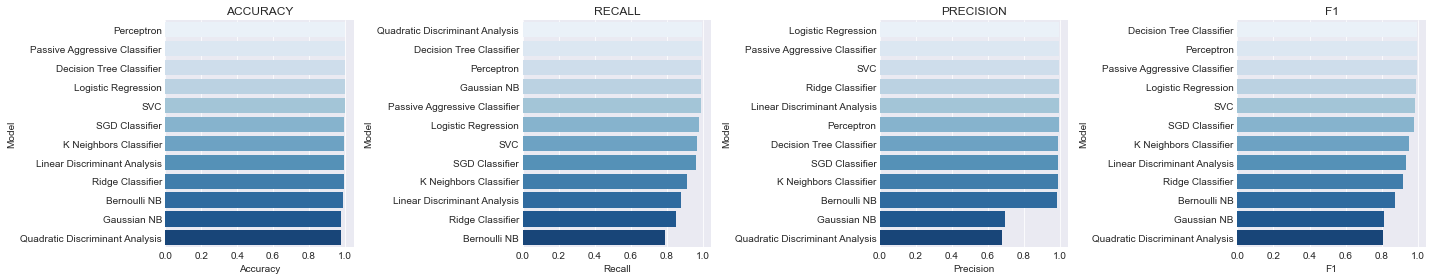

In [23]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'Blues', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'Blues', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'Blues', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'Blues', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

In [24]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 3000)
parameters = {"C": np.linspace(0.2, 1, 5), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=3000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='recall')

In [26]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
29,9.465404,1.174083,0.001883,0.00054,1,1,"{'C': 1.0, 'l1_ratio': 1.0}",0.974359,0.974359,0.948718,...,0.994413,0.988796,0.988796,0.988796,0.988796,0.988796,0.988796,0.988796,0.989922,0.001866


In [28]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 2000, C = 1, l1_ratio = 1)
model.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=1, max_iter=2000, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      0.99      0.99       397

    accuracy                           1.00      8000
   macro avg       1.00      0.99      1.00      8000
weighted avg       1.00      1.00      1.00      8000



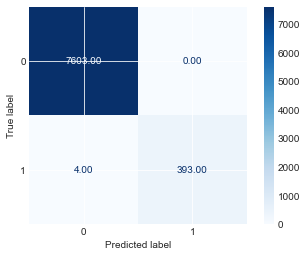

In [29]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**RIDGE**

In [30]:
model = RidgeClassifier()
parameters = {"alpha": np.linspace(1, 10, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             return_train_score=True, scoring='recall')

In [31]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015257,0.002522,0.002392,0.000914,1,{'alpha': 1.0},0.871795,0.820513,0.846154,0.85,...,0.851955,0.851541,0.854342,0.854342,0.851541,0.854342,0.845938,0.851541,0.851107,0.002926


In [32]:
model = RidgeClassifier(alpha = 1)
model.fit(X_train, y_train)

RidgeClassifier(alpha=1)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7603
           1       1.00      0.85      0.92       397

    accuracy                           0.99      8000
   macro avg       1.00      0.93      0.96      8000
weighted avg       0.99      0.99      0.99      8000



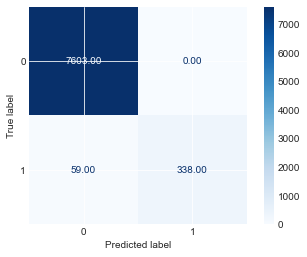

In [33]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [34]:
model = KNeighborsClassifier()
parameters = {"n_neighbors": range(2, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 11)}, return_train_score=True,
             scoring='recall')

In [36]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.076399,0.031163,0.479313,0.119074,3,{'n_neighbors': 3},0.923077,0.923077,0.923077,0.925,...,0.972067,0.97479,0.971989,0.971989,0.969188,0.969188,0.977591,0.971989,0.971734,0.003625


In [37]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      0.97      0.99       397

    accuracy                           1.00      8000
   macro avg       1.00      0.99      0.99      8000
weighted avg       1.00      1.00      1.00      8000



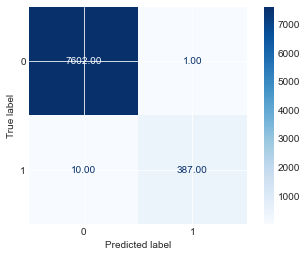

In [38]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SGD**

In [39]:
model = SGDClassifier(penalty = "elasticnet")
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1], "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(penalty='elasticnet'),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='recall')

In [40]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
5,0.042287,0.010015,0.001498,0.000498,0.0001,1,"{'alpha': 0.0001, 'l1_ratio': 1.0}",0.974359,0.974359,0.948718,...,0.997207,0.994398,0.994398,0.994398,0.994398,0.994398,0.997199,0.994398,0.994962,0.00112


In [41]:
model = SGDClassifier(penalty = "elasticnet", alpha = 0.0001, l1_ratio = 1)
model.fit(X_train, y_train)

SGDClassifier(l1_ratio=1, penalty='elasticnet')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      0.99      1.00       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



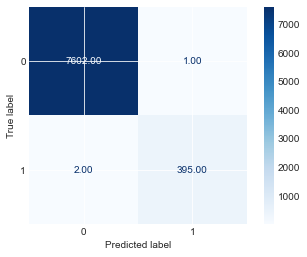

In [42]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PERCEPTRON**

In [43]:
model = Perceptron()
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1]}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='recall')

In [44]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.030587,0.0506,0.001497,0.000498,0.0001,{'alpha': 0.0001},0.974359,1.0,0.948718,1.0,...,0.997207,0.994398,0.991597,0.994398,0.997199,0.997199,0.997199,0.994398,0.994963,0.002739


In [45]:
model = Perceptron(alpha = 0.0001)
model.fit(X_train, y_train)

Perceptron()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       0.99      1.00      0.99       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



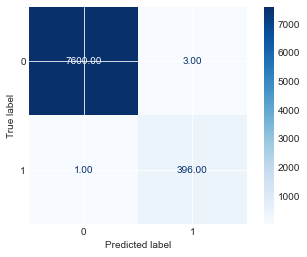

In [46]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PASSIVE AGGRESIVE**

In [47]:
model = PassiveAggressiveClassifier()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': range(1, 11)}, return_train_score=True,
             scoring='recall')

In [48]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
9,0.010571,0.001353,0.001498,0.000498,10,{'C': 10},0.974359,0.974359,0.948718,1.0,...,0.997207,0.991597,0.994398,0.988796,0.994398,0.991597,0.997199,0.994398,0.9944,0.003069


In [53]:
model = PassiveAggressiveClassifier(C = 10)
model.fit(X_train, y_train)

PassiveAggressiveClassifier(C=10)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      0.99      1.00       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



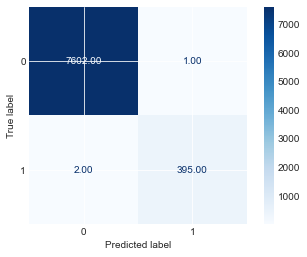

In [54]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**LDA**

In [55]:
model = LinearDiscriminantAnalysis()
parameters = {"solver": ('svd', 'lsqr', 'eigen')}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ('svd', 'lsqr', 'eigen')},
             return_train_score=True, scoring='recall')

In [56]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.064476,0.053372,0.001797,0.0004,svd,{'solver': 'svd'},0.871795,0.871795,0.871795,0.85,...,0.879888,0.882353,0.876751,0.879552,0.87395,0.876751,0.879552,0.876751,0.878532,0.002614


In [57]:
model = LinearDiscriminantAnalysis(solver = "svd")
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7603
           1       1.00      0.88      0.94       397

    accuracy                           0.99      8000
   macro avg       1.00      0.94      0.97      8000
weighted avg       0.99      0.99      0.99      8000



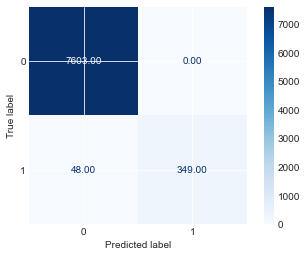

In [58]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**QDA**

In [59]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      7603
           1       0.67      0.99      0.80       397

    accuracy                           0.98      8000
   macro avg       0.84      0.98      0.90      8000
weighted avg       0.98      0.98      0.98      8000



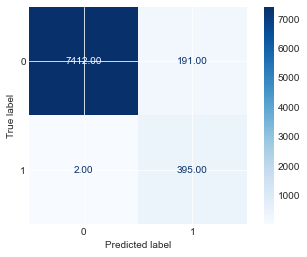

In [60]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [61]:
model = SVC()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': range(1, 11)},
             return_train_score=True, scoring='recall')

In [62]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
6,0.250427,0.030798,0.02104,0.002066,7,{'C': 7},0.974359,0.974359,0.974359,0.95,...,1.0,1.0,0.997199,0.997199,1.0,0.997199,0.997199,0.997199,0.998041,0.001283


In [63]:
model = SVC(C = 7)
model.fit(X_train, y_train)

SVC(C=7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      1.00      1.00       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



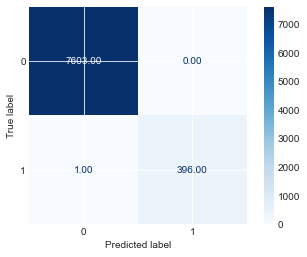

In [64]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [65]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7603
           1       0.69      0.99      0.81       397

    accuracy                           0.98      8000
   macro avg       0.85      0.98      0.90      8000
weighted avg       0.98      0.98      0.98      8000



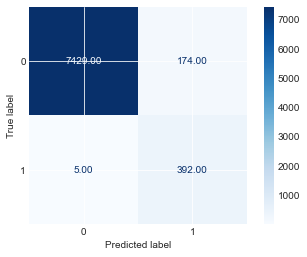

In [66]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**BERNOULLI NB**

In [67]:
model = BernoulliNB()
parameters = {"alpha": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='recall')

In [68]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.014163,0.001075,0.003489,0.00128,0.1,{'alpha': 0.1},0.769231,0.74359,0.820513,0.8,...,0.787709,0.789916,0.795518,0.789916,0.787115,0.787115,0.795518,0.787115,0.790651,0.003525


In [69]:
model = BernoulliNB(alpha = 0.1)
model.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7603
           1       0.98      0.79      0.88       397

    accuracy                           0.99      8000
   macro avg       0.99      0.90      0.94      8000
weighted avg       0.99      0.99      0.99      8000



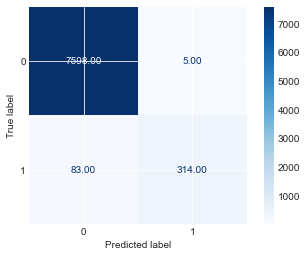

In [70]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [71]:
model = DecisionTreeClassifier()
parameters = {"max_depth": range(2, 6), "min_samples_split": range(2, 6), "min_samples_leaf": range(2, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "recall")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 6),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(2, 6)},
             return_train_score=True, scoring='recall')

In [72]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
38,0.155185,0.015055,0.001995,0.000631,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.974359,1.0,...,0.994413,0.997199,0.994398,0.994398,0.994398,0.994398,0.994398,0.994398,0.994962,0.00112


In [73]:
model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       1.00      0.99      1.00       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



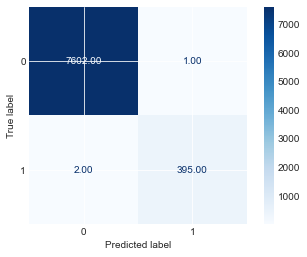

In [74]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [75]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 2000, C = 1, l1_ratio = 1),
    'Ridge Classifier': RidgeClassifier(alpha = 1),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 3),
    'SGD Classifier': SGDClassifier(penalty = "elasticnet", alpha = 0.0001, l1_ratio = 1),
    'Perceptron': Perceptron(alpha = 0.0001),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(C = 10),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver = "svd"),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(C = 7),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(alpha = 0.1),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 4)
}

In [82]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [83]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

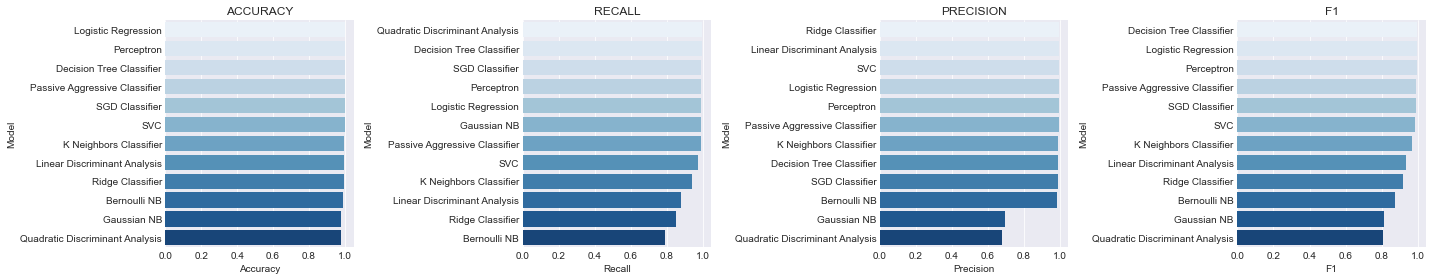

In [84]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'Blues', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'Blues', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'Blues', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'Blues', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

In [85]:
results

,Model,Accuracy,Accuracy Std,Precision,Precision Std,Recall,Recall Std,F1,F1 Std
0,Logistic Regression,0.9992,0.0011,0.9949,0.0102,0.9897,0.0170,0.9923,0.0119
1,Ridge Classifier,0.9924,0.0010,0.9971,0.0086,0.8488,0.0196,0.9169,0.0120
2,K Neighbors Classifier,0.9968,0.0019,0.9920,0.0122,0.9419,0.0339,0.9660,0.0199
3,SGD Classifier,0.9989,0.0014,0.9875,0.0168,0.9898,0.0170,0.9886,0.0146
4,Perceptron,0.9992,0.0011,0.9949,0.0102,0.9898,0.0170,0.9923,0.0119
5,Passive Aggressive Classifier,0.9991,0.0013,0.9949,0.0103,0.9872,0.0172,0.9910,0.0129
6,Linear Discriminant Analysis,0.9938,0.0010,0.9971,0.0086,0.8765,0.0137,0.9329,0.0106
7,Quadratic Discriminant Analysis,0.9756,0.0058,0.6757,0.0525,0.9949,0.0103,0.8037,0.0383
8,SVC,0.9982,0.0017,0.9950,0.0100,0.9698,0.0350,0.9818,0.0181
9,Gaussian NB,0.9774,0.0050,0.6929,0.0470,0.9873,0.0171,0.8135,0.0348


---
## **4. FINE TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION**
---

We will use voting classifier to increase our model performance.
- We choose QDA, Decision Tree, Perceptron, Gaussian NB, and Passive Aggressive because they have the highest recall score
- We get train Accuracy = 1
- We get train Precision = 0.99
- We get train Recall = 0.99

After we run using test data
- We get test Accuracy = 1
- We get test Precision = 0.99
- We get test Recall = 0.97

The model have done the work very well and this model is good to use.

In [86]:
clf1 = QuadraticDiscriminantAnalysis()
clf2 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 3, min_samples_split = 4)
clf3 = Perceptron(alpha = 0.0001)
clf4 = GaussianNB()
clf5 = PassiveAggressiveClassifier(C = 3)
eclf = VotingClassifier(estimators=[("alg1", clf1), ("alg2", clf2), ("alg3", clf3), ("alg4", clf4), ("alg5", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7603
           1       0.99      0.99      0.99       397

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



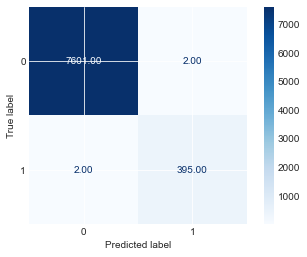

In [87]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1905
           1       0.99      0.97      0.98        95

    accuracy                           1.00      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



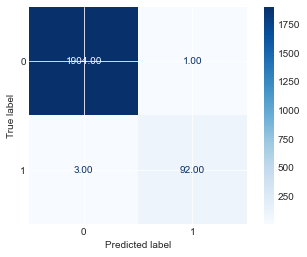

In [88]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(eclf, X_test, y_test, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()